In [1]:
!pip install folium

In [2]:
import folium

In [8]:
gps   = [35.2309931, 129.0801175]
zoom  = 13
map   = folium.Map( location= gps )

In [9]:
map

In [10]:
map.save('./pusan.html')

In [11]:
# 기본 줌 적용
map   = folium.Map( location = gps, zoom_start = zoom )
map

In [13]:
import pandas as pd
import numpy as np
from plotnine import *
import re

In [15]:
park = pd.read_csv('data/korean_park.csv', encoding='euc-kr')
park.shape

(18870, 20)

In [16]:
park.head(7)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,42790-00004,화천 어린이공원1,어린이공원,강원도 화천군 화천읍 아리 256-1번지 일원,강원도 화천군 화천읍 아리 256-1번지 일원,38.105568,127.707075,1048.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
1,42790-00004,화천 어린이공원3,어린이공원,강원도 화천군 산수화로5길 24-5,강원도 화천군 화천읍 중리 191-25번지 일원,38.108973,127.708868,1760.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
2,42790-00004,화천 어린이공원4,어린이공원,강원도 화천군 산천어길 206,강원도 화천군 화천읍 신읍리 658-4번지 일원,38.114549,127.702736,1511.0,NaN,NaN,NaN,NaN,NaN,1985-06-05,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
3,42790-00008,화천 어린이공원8,어린이공원,강원도 화천군 산수화로8,강원도 화천군 화천읍 아리 244-10번지 일원,38.106931,127.706165,752.0,NaN,NaN,NaN,NaN,NaN,2010-08-27,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
4,42790-00008,사내 어린이공원,어린이공원,강원도 화천군 사내면 사창리 969-4번지 일원,강원도 화천군 사내면 사창리 969-4번지 일원,38.069006,127.523321,1385.0,NaN,"그네, 미끄럼틀등",NaN,NaN,NaN,1998-12-14,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
5,42790-00008,신읍1 어린이공원,어린이공원,강원도 화천군 화천읍 신읍리 626-1번지 일원,강원도 화천군 화천읍 신읍리 626-1번지 일원,38.113795,127.697401,2340.0,NaN,NaN,NaN,NaN,NaN,2010-08-27,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN
6,42790-00008,신읍2 어린이공원,어린이공원,강원도 화천군 화천읍 신읍리 599번지 일원,강원도 화천군 화천읍 신읍리 599번지 일원,38.116759,127.698624,1580.0,NaN,NaN,NaN,NaN,NaN,2010-08-27,강원도 화천군청,033-440-2467,2018-08-10,4310000,강원도 화천군,NaN


In [17]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18870 entries, 0 to 18869
Data columns (total 20 columns):
관리번호            18870 non-null object
공원명             18870 non-null object
공원구분            18870 non-null object
소재지도로명주소        8742 non-null object
소재지지번주소         17751 non-null object
위도              18870 non-null float64
경도              18870 non-null float64
공원면적            18870 non-null float64
공원보유시설(운동시설)    5005 non-null object
공원보유시설(유희시설)    7345 non-null object
공원보유시설(편익시설)    5508 non-null object
공원보유시설(교양시설)    1240 non-null object
공원보유시설(기타시설)    3218 non-null object
지정고시일           15913 non-null object
관리기관명           18116 non-null object
전화번호            17680 non-null object
데이터기준일자         18870 non-null object
제공기관코드          18870 non-null object
제공기관명           18870 non-null object
Unnamed: 19     0 non-null float64
dtypes: float64(4), object(16)
memory usage: 2.9+ MB


In [20]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10128
소재지지번주소          1119
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13865
공원보유시설(유희시설)    11525
공원보유시설(편익시설)    13362
공원보유시설(교양시설)    17630
공원보유시설(기타시설)    15652
지정고시일            2957
관리기관명             754
전화번호             1190
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18870
dtype: int64

In [22]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

plt.rc('font', family='Malgun Gothic')
# plt.rc('font', family='AppleGothic') # Mac
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

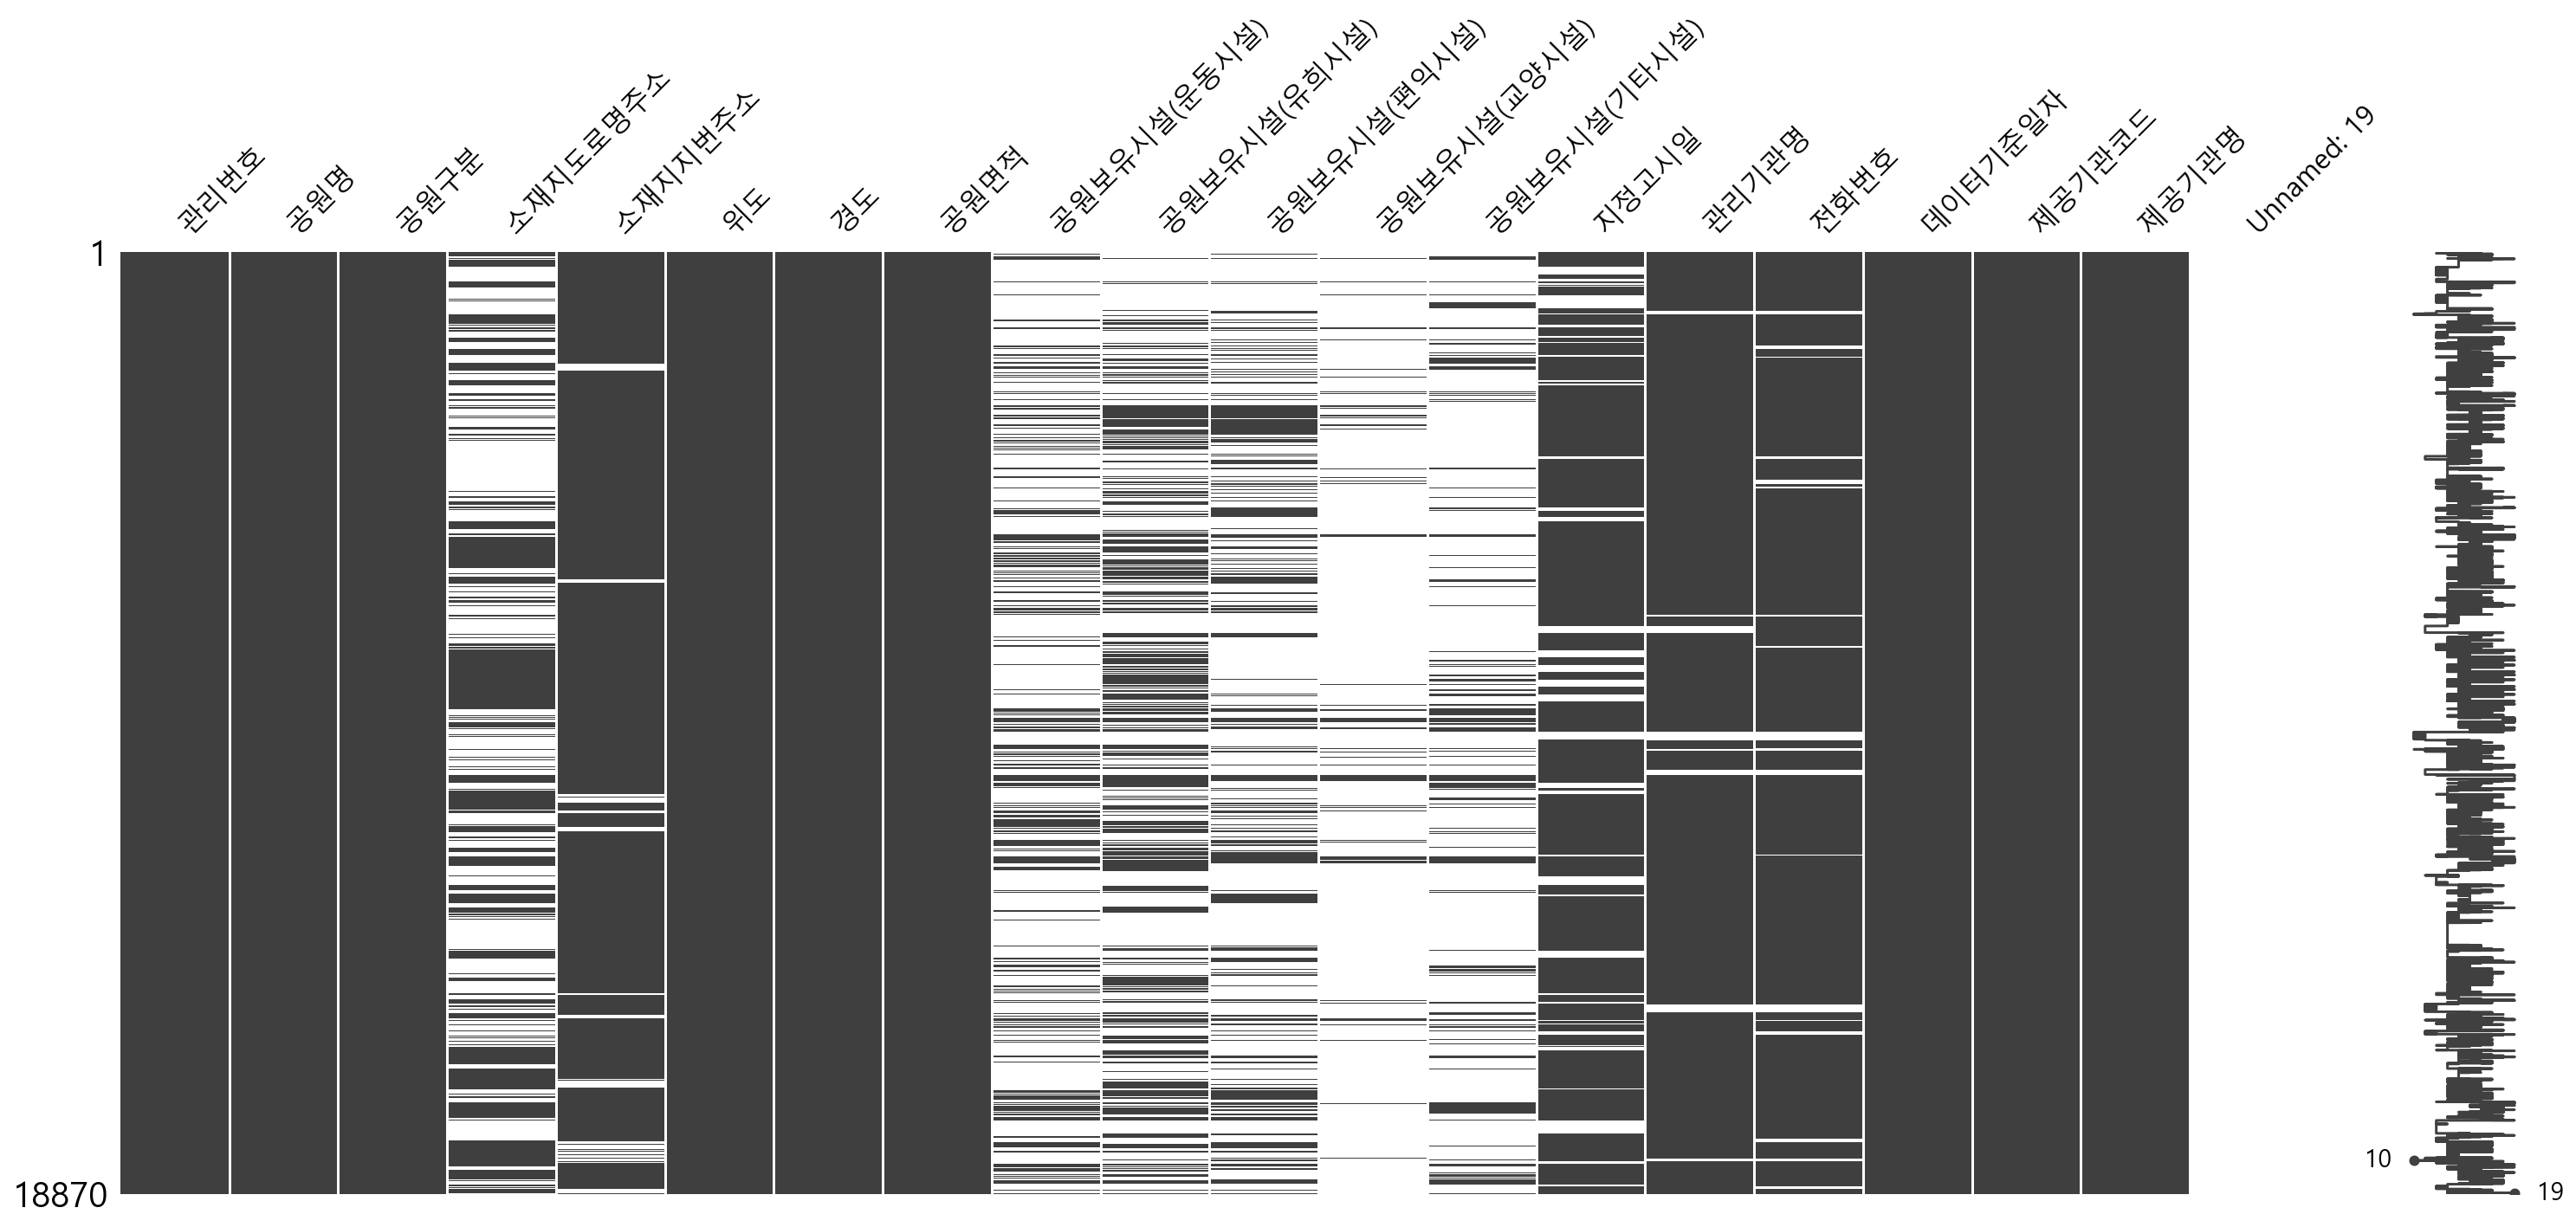

In [23]:
import missingno as msno

msno.matrix(park)

In [24]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [25]:
park.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)', '공원보유시설(기타시설)', '지정고시일', '관리기관명', 'Unnamed: 19'], inplace=True)

In [27]:
park.shape

(18870, 12)

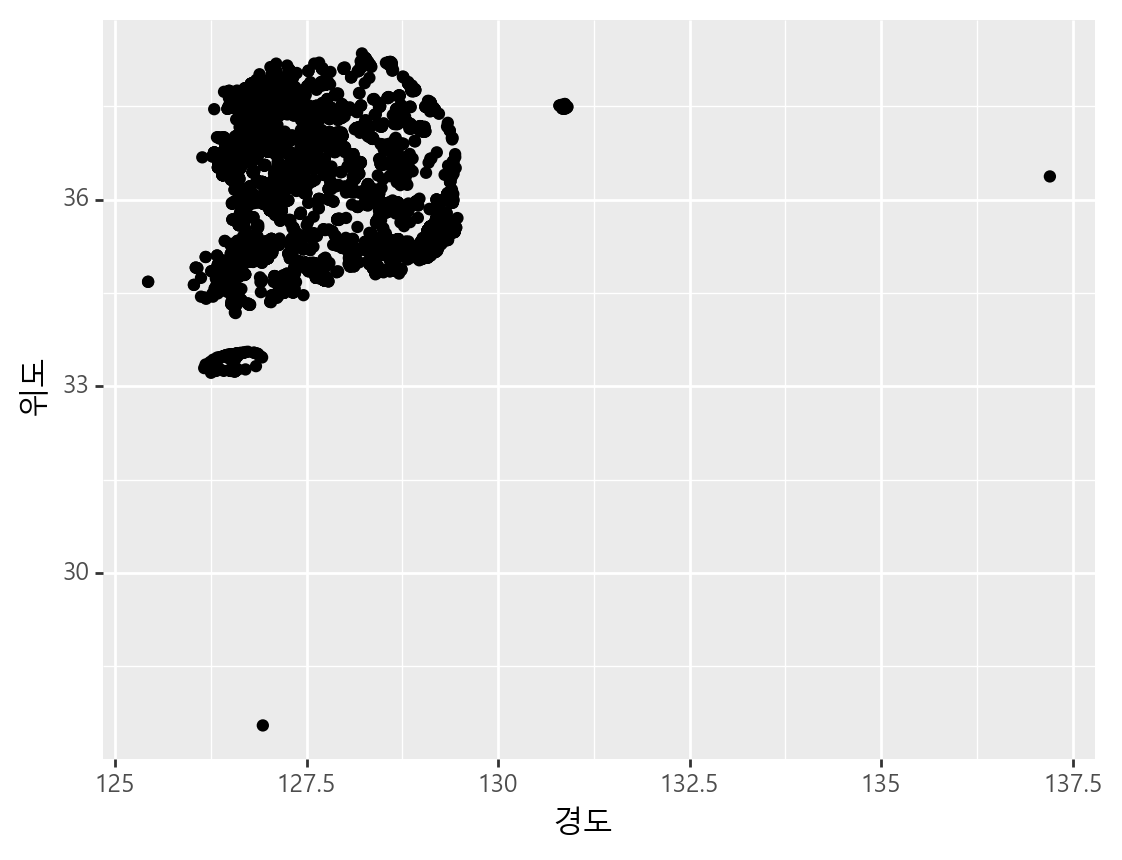

<ggplot: (-9223371928784200104)>

In [29]:
(ggplot(park)
 + aes(x='경도', y='위도')
 + geom_point()
 + theme(text=element_text(family='Malgun Gothic'))
)

In [30]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

In [ ]:
# park['공원면적'] = park['공원면적'].str.replace(',', '').astype(float)
# park['공원면적'].head()

In [31]:
park['공원면적비율'] = park['공원면적'].apply(lambda x : np.sqrt(x)*0.01)
park['공원면적비율'].head()

0    0.323728
1    0.419524
2    0.388716
3    0.274226
4    0.372156
Name: 공원면적비율, dtype: float64

In [32]:
park['소재지도로명주소'].isnull().sum()

10128

In [33]:
park['소재지지번주소'].isnull().sum()

1119

In [34]:
park['시도'] = park['소재지도로명주소'].str.split(' ', expand=True)[0]

In [40]:
park['구군'] = park['소재지도로명주소'].str.split(' ', expand=True)[1]

In [36]:
park_loc_notnull = park.loc[(park['위도'] > 32) & ( park['경도'] < 132 ) & park['시도'].notnull() ]
park_loc_notnull.shape

(8742, 14)

In [47]:
# 경기도 공원 만들기
geo_df = park.loc[ park.시도 == '경기도' ]
map = folium.Map(location=[ geo_df.위도.mean(),
                           geo_df.경도.mean()], zoom_start=8)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + '-' + geo_df.loc[n, '소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        radius=geo_df['공원면적비율'][n],
        popup=park_name,
        tooltip=park_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map.save("./g.html")         

In [48]:
# 부산
geo_df = park.loc[ park.시도 == '부산광역시' ]
map = folium.Map(location=[ geo_df.위도.mean(),
                           geo_df.경도.mean()], zoom_start=8)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + '-' + geo_df.loc[n, '소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        radius=geo_df['공원면적비율'][n],
        popup=park_name,
        tooltip=park_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map.save("./park_b.html")         

In [ ]:
geo_df = park.loc[ park.공원명 == '부산광역시' ]
map = folium.Map(location=[ geo_df.위도.mean(),
                           geo_df.경도.mean()], zoom_start=8)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + '-' + geo_df.loc[n, '소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location=[geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
        radius=geo_df['공원면적비율'][n],
        popup=park_name,
        tooltip=park_name,
        color=icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)
    
map.save("./park_child.html")         